# Binary vs. Multinomial Decision Trees
Tree depth represents how many questions or splits are implemented before the predicted classification is reached. The node at the end of each route or branch is referred to as the leaf node. The longest branch defines the tree's overall depth. Trees that are particularly deep are especially prone to overfitting. Setting a max depth limits risk of overfitting, but at the expense of increased error due to bias. Ideally, both error due to bias and error due to variance would be minimized.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns

import sklearn.metrics as metrics
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC

In [2]:
# Read in csv of data which has already undergone feature engineering
data = pd.read_csv("../5_profiles/reduced_dim_5.csv")

# Binary Decision Tree

In [3]:
# Create column representing the Frontend profile as a binary variable
data["Frontend"] = np.where(data["profile"] == "Frontend", 1, 0)

In [4]:
# Set skills as the input variable
X = data.iloc[:, 1:-1]

# Set the Frontend profile as the target variable
y_bi = data.iloc[:, -1]

In [5]:
# Split to training and testing sets
X_train, X_test, y_train, y_test = tts(X, y_bi, test_size=0.3, random_state=0)

In [6]:
# Instantiating DecisionTreeClassifier Object
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
classifier.__getstate__()

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 0,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'presort': 'deprecated',
 'ccp_alpha': 0.0,
 'n_features_in_': 117,
 'n_features_': 117,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 117,
 'tree_': <sklearn.tree._tree.Tree at 0x16cb20c8>,
 '_sklearn_version': '0.23.2'}

Provided below are three different metrics used in assessing machine learning algorithm performance.
## Accuracy
Accuracy can be a useful measure if we have the same amount of samples per class. But if we have an imbalanced set of samples, accuracy isn't useful at all because accuracy is biased on size of test data. Even more so, a test can have a high accuracy but actually perform worse than a test with a lower accuracy.
## ROCAUC Curve & ROC_AUC Score
This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It's generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class. In order to get one metric that tells us how good our curve is, we can calculate the Area Under the ROC Curve, or ROC AUC score. This tells us how good at ranking predictions your model is.
## Confusion Matrix
The ConfusionMatrix visualizer is a ScoreVisualizer that takes a fitted scikit-learn classifier and a set of test X and y values and returns a report showing how each of the test values predicted classes compare to their actual classes. Data scientists use confusion matrices to understand which classes are most easily confused. These provide similar information as what is available in a ClassificationReport, but rather than top-level scores, they provide deeper insight into the classification of individual data points.

In [8]:
# Make Predictions
y_pred = classifier.predict(X_test)
print(
    "Accuracy of decision tree classifier on test set: {:.2f}".format(
        classifier.score(X_test, y_test)
    )
)

Accuracy of decision tree classifier on test set: 0.83


C:\Users\oefel\.virtualenvs\Celerative_Working-MkC17mr_\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


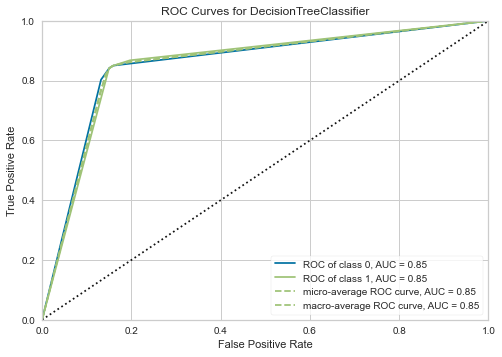

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [9]:
# Instantiate the visualizer with the classification model
model = DecisionTreeClassifier()
visualizer = ROCAUC(model, classes=[0, 1])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

[[104  23]
 [ 17  89]]


<AxesSubplot:>

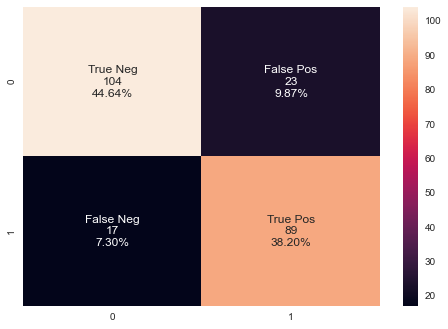

In [10]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm, annot=labels, fmt="")

Finally, one of the strengths of the Decision Tree algorithm lies in its ability to be easily visualized.

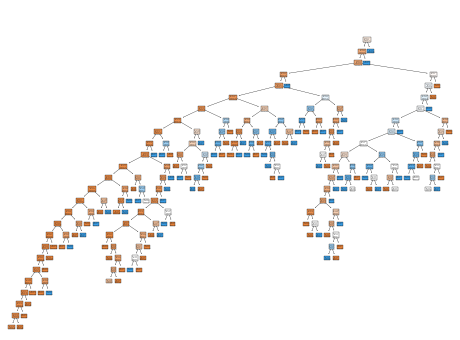

<Figure size 1584x1296 with 0 Axes>

In [11]:
clf = DecisionTreeClassifier(
    max_depth=25
)  # max_depth is maximum number of levels in the tree
fig, ax = plt.subplots()
clf = clf.fit(X, y_bi)
plot_tree(clf, filled=True)
plt.figure(figsize=(22, 18))
fig.set_size_inches(8, 6)
#plt.savefig("binary_decision_tree.png")

# Multinomial Decision Tree

In [12]:
# getting list of skills
X = data.iloc[:, 1:-1]

# formatting target variable
y_multi = data.iloc[:, 0]

In [13]:
# Split to training and testing sets
X_train, X_test, y_train, y_test = tts(X, y_multi, test_size=0.3, random_state=0)

In [14]:
# Instantiating DecisionTreeClassifier Object -- criterian set to gini to minimize misclassification
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
classifier.__getstate__()

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 0,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'presort': 'deprecated',
 'ccp_alpha': 0.0,
 'n_features_in_': 117,
 'n_features_': 117,
 'n_outputs_': 1,
 'classes_': array(['Database', 'Frontend', 'Fullstack', 'ML', 'QA'], dtype=object),
 'n_classes_': 5,
 'max_features_': 117,
 'tree_': <sklearn.tree._tree.Tree at 0x1686dd40>,
 '_sklearn_version': '0.23.2'}

In [16]:
# Making predictions
y_pred = classifier.predict(X_test)
print(
    "Accuracy of decision tree classifier on test set: {:.2f}".format(
        classifier.score(X_test, y_test)
    )
)

Accuracy of decision tree classifier on test set: 0.70


C:\Users\oefel\.virtualenvs\Celerative_Working-MkC17mr_\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


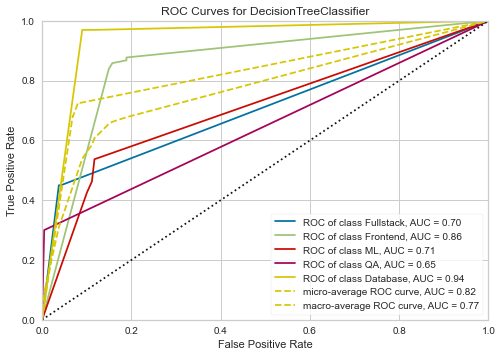

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [17]:
# Instantiate the visualizer with the classification model
model = DecisionTreeClassifier()
visualizer = ROCAUC(model, classes=["Fullstack", "Frontend", "ML", "QA", "Database"])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

C:\Users\oefel\.virtualenvs\Celerative_Working-MkC17mr_\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


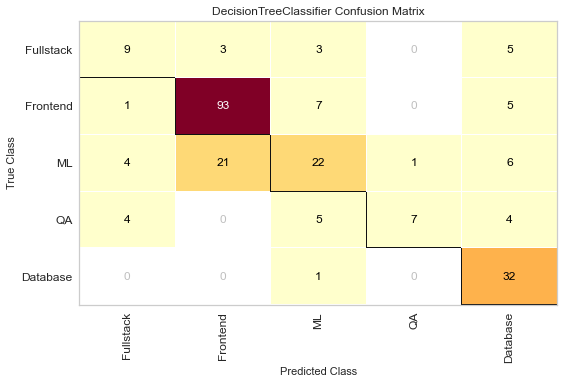

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [18]:
cm_viz = ConfusionMatrix(
    classifier, classes=["Fullstack", "Frontend", "ML", "QA", "Database"]
)

cm_viz.fit(X_train, y_train)
cm_viz.score(X_test, y_test)

cm_viz.show()

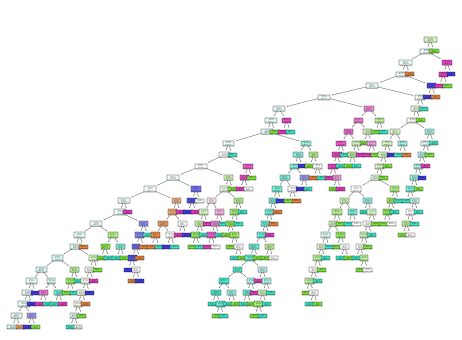

<Figure size 1584x1296 with 0 Axes>

In [19]:
clf = DecisionTreeClassifier(
    max_depth=25
)  # max_depth is maximum number of levels in the tree
fig, ax = plt.subplots()
clf = clf.fit(X, y_multi)
plot_tree(clf, filled=True)
plt.figure(figsize=(22, 18))
fig.set_size_inches(8, 6)
# plt.savefig("multinomial_decision_tree.png")

In [20]:
# showing target variable within y binary and multinomial environments
multi_vs_binary = pd.concat([y_bi, y_multi], axis=1)
multi_vs_binary

,Frontend,profile
0,0,Fullstack
1,1,Frontend
2,0,ML
3,0,ML
4,0,QA
...,...,...
770,1,Frontend
771,1,Frontend
772,1,Frontend
773,0,ML


Advantages to Decision Trees:
 - Easy to interpret
 - Make for straightforward visualizations. Beause the internal workings can be observed, work is reproduicable
 - Can handle both numerical and categorical data
 - Perform well on large datasets
 - Are extremely fast
 <br>
 <br>
Disadvantages to Decision Trees:
 - Don't have the same level of predictive accuracy as other approaches, as a small change in the data can cause a large change in the final estimated tree. 
  - Even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. 
  - Therefore, in most applications, it's best to aggregate many decision trees with methods like bagging, random forests, and boosting, which sees substantial improvement to algorithm predictive performance.